In [1]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

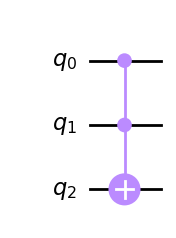

In [2]:
circ = QuantumCircuit(3)
circ.ccx(0, 1, 2)
circ.draw(output='mpl')

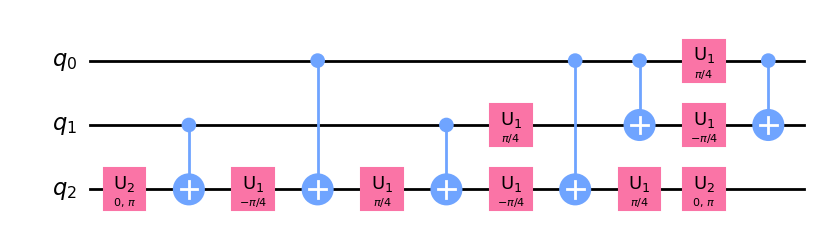

In [3]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u1', 'u2', 'u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(circ)
new_circ.draw(output='mpl')

In [4]:
from qiskit.transpiler import passes
[pass_ for pass_ in dir(passes) if pass_[0].isupper()]

['ALAPSchedule',
 'ALAPScheduleAnalysis',
 'ASAPSchedule',
 'ASAPScheduleAnalysis',
 'AlignMeasures',
 'ApplyLayout',
 'BIPMapping',
 'BarrierBeforeFinalMeasurements',
 'BasicSwap',
 'BasisTranslator',
 'CSPLayout',
 'CXCancellation',
 'CXDirection',
 'CheckCXDirection',
 'CheckGateDirection',
 'CheckMap',
 'Collect1qRuns',
 'Collect2qBlocks',
 'CollectCliffords',
 'CollectLinearFunctions',
 'CollectMultiQBlocks',
 'CommutationAnalysis',
 'CommutativeCancellation',
 'CommutativeInverseCancellation',
 'Commuting2qGateRouter',
 'ConsolidateBlocks',
 'ConstrainedReschedule',
 'ContainsInstruction',
 'ConvertConditionsToIfOps',
 'CountOps',
 'CountOpsLongestPath',
 'CrosstalkAdaptiveSchedule',
 'DAGFixedPoint',
 'DAGLongestPath',
 'Decompose',
 'DenseLayout',
 'Depth',
 'DynamicalDecoupling',
 'EchoRZXWeylDecomposition',
 'EnlargeWithAncilla',
 'Error',
 'FixedPoint',
 'FullAncillaAllocation',
 'GateDirection',
 'GatesInBasis',
 'HighLevelSynthesis',
 'HoareOptimizer',
 'InstructionDuratio

In [5]:
from qiskit.transpiler import CouplingMap, Layout
from qiskit.transpiler.passes import BasicSwap, LookaheadSwap, StochasticSwap

coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

circuit = QuantumCircuit(7)
circuit.h(3)
circuit.cx(0, 6)
circuit.cx(6, 0)
circuit.cx(0, 1)
circuit.cx(3, 1)
circuit.cx(3, 0)

coupling_map = CouplingMap(couplinglist=coupling)

bs = BasicSwap(coupling_map=coupling_map)
pass_manager = PassManager(bs)
basic_circ = pass_manager.run(circuit)

ls = LookaheadSwap(coupling_map=coupling_map)
pass_manager = PassManager(ls)
lookahead_circ = pass_manager.run(circuit)

ss = StochasticSwap(coupling_map=coupling_map)
pass_manager = PassManager(ss)
stochastic_circ = pass_manager.run(circuit)

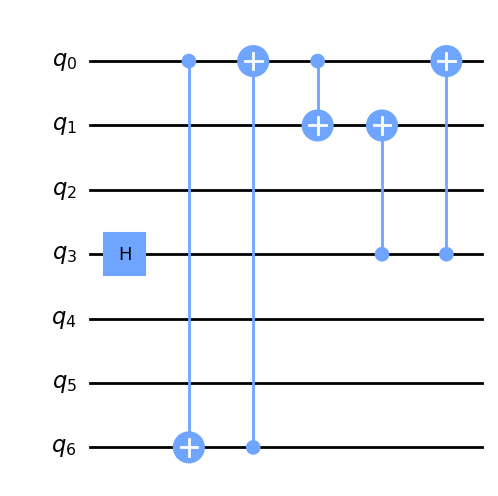

In [6]:
circuit.draw(output='mpl')

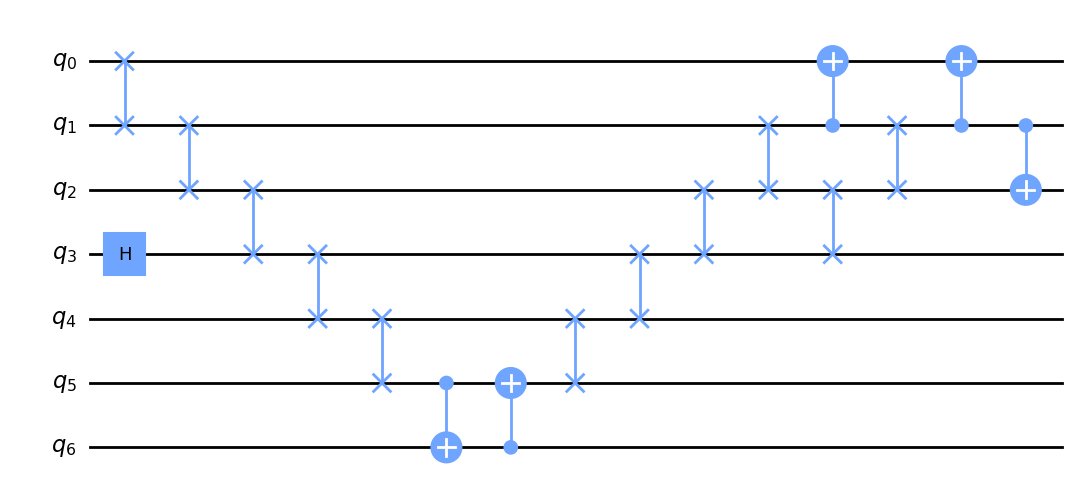

In [7]:
basic_circ.draw(output='mpl')

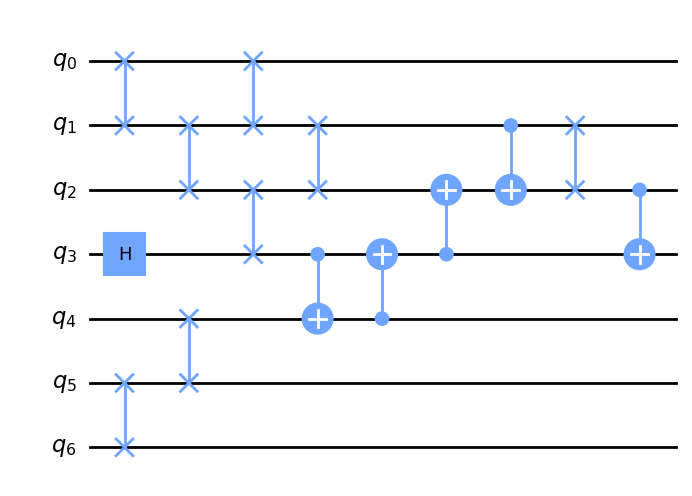

In [8]:
lookahead_circ.draw(output='mpl')

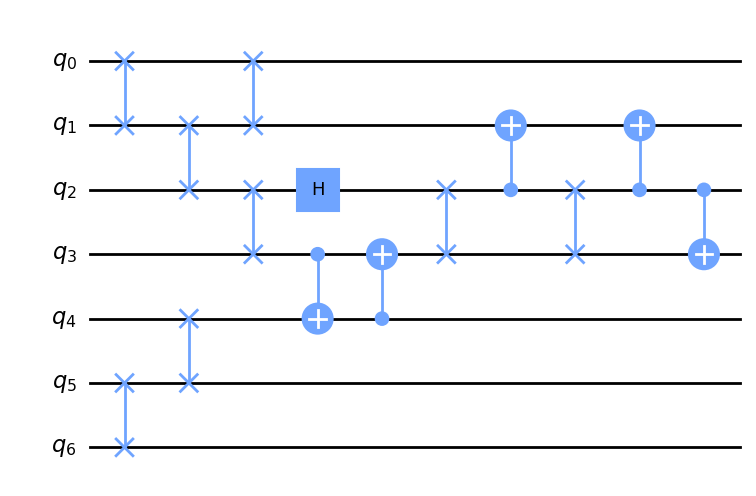

In [9]:
stochastic_circ.draw(output='mpl')

In [10]:
import math
from qiskit.providers.fake_provider import FakeTokyo

backend = FakeTokyo()     # mimics the tokyo device in terms of coupling map and basis gates

In [11]:
qc = QuantumCircuit(10)

random_state = [
    1 / math.sqrt(4) * complex(0, 1),
    1 / math.sqrt(8) * complex(1, 0),
    0,
    0,
    0,
    0,
    0,
    0,
    1 / math.sqrt(8) * complex(1, 0),
    1 / math.sqrt(8) * complex(0, 1),
    0,
    0,
    0,
    0,
    1 / math.sqrt(4) * complex(1, 0),
    1 / math.sqrt(8) * complex(1, 0)]

qc.initialize(random_state, range(4))
qc.draw()

»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
q_6: »
     »
q_7: »
     »
q_8: »
     »
q_9: »
     »
«     ┌────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                           ├
«     │                                                                            │
«q_1: ┤1                                                                           ├
«     │  Initialize(0.5j,0.35355,0,0,0,0,0,0,0.35355,0.35355j,0,0,0,0,0.5,0.35355) │
«q_2: ┤2                                                                           ├
«     │                                                                            │
«q_3: ┤3                                                                           ├
«     └────────────────────────────────────────────────────────────────────────────┘
«q_4: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_5: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_6: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_7: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_8: ──────────────────────────────────────────────────────────────────────────────
«                                                                                   
«q_9: ──────────────────────────────────────────────────────────────────────────────
«

In [12]:
optimized_0 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=0)
print('gates = ', optimized_0.count_ops())
print('depth = ', optimized_0.depth())

gates =  OrderedDict([('cx', 70), ('u3', 15), ('u1', 15), ('reset', 4)])
depth =  87


In [13]:
optimized_1 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=1)
print('gates = ', optimized_1.count_ops())
print('depth = ', optimized_1.depth())

gates =  OrderedDict([('cx', 22), ('u3', 15), ('u1', 6)])
depth =  40


In [14]:
optimized_2 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=2)
print('gates = ', optimized_2.count_ops())
print('depth = ', optimized_2.depth())

gates =  OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth =  38


In [15]:
optimized_3 = transpile(qc, backend=backend, seed_transpiler=11, optimization_level=3)
print('gates = ', optimized_3.count_ops())
print('depth = ', optimized_3.depth())

gates =  OrderedDict([('cx', 20), ('u3', 15), ('u1', 6)])
depth =  38


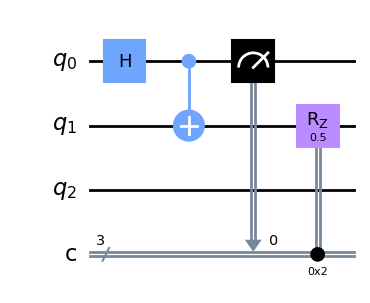

In [16]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.dagcircuit import DAGCircuit
q = QuantumRegister(3, 'q')
c = ClassicalRegister(3, 'c')
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(0.5, q[1]).c_if(c, 2)
circ.draw(output='mpl')

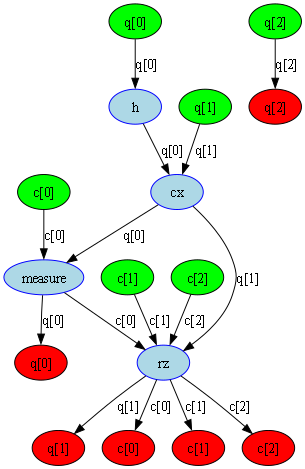

In [17]:
from qiskit.converters import circuit_to_dag
from qiskit.tools.visualization import dag_drawer
dag = circuit_to_dag(circ)
dag_drawer(dag)

In [18]:
dag.op_nodes()

[DAGOpNode(op=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(3, 'q'), 0),), cargs=()),
 DAGOpNode(op=Instruction(name='cx', num_qubits=2, num_clbits=0, params=[]), qargs=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1)), cargs=()),
 DAGOpNode(op=Instruction(name='measure', num_qubits=1, num_clbits=1, params=[]), qargs=(Qubit(QuantumRegister(3, 'q'), 0),), cargs=(Clbit(ClassicalRegister(3, 'c'), 0),)),
 DAGOpNode(op=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.5]), qargs=(Qubit(QuantumRegister(3, 'q'), 1),), cargs=())]

In [19]:
node = dag.op_nodes()[3]
print("node name: ", node.name)
print("node op: ", node.op)
print("node qargs: ", node.qargs)
print("node cargs: ", node.cargs)
print("node condition: ", node.op.condition)

node name:  rz
node op:  Instruction(name='rz', num_qubits=1, num_clbits=0, params=[0.5])
node qargs:  (Qubit(QuantumRegister(3, 'q'), 1),)
node cargs:  ()
node condition:  (ClassicalRegister(3, 'c'), 2)


ValueError: Could not save to JPEG for display

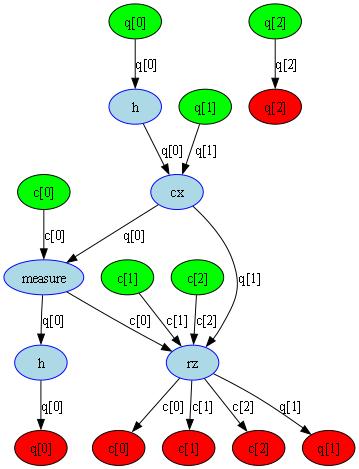

In [20]:
from qiskit.circuit.library import HGate
dag.apply_operation_back(HGate(), qargs=[q[0]])
dag_drawer(dag)

ValueError: Could not save to JPEG for display

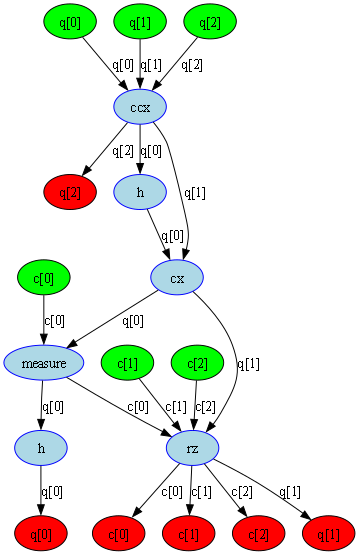

In [21]:
from qiskit.circuit.library import CCXGate
dag.apply_operation_front(CCXGate(), qargs=[q[0], q[1], q[2]], cargs=[])
dag_drawer(dag)

ValueError: Could not save to JPEG for display

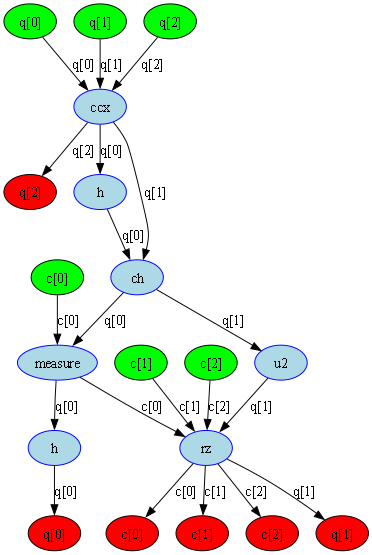

In [22]:
from qiskit.circuit.library import CHGate, U2Gate, CXGate
mini_dag = DAGCircuit()
p = QuantumRegister(2, "p")
mini_dag.add_qreg(p)
mini_dag.apply_operation_back(CHGate(), qargs=[p[1], p[0]])
mini_dag.apply_operation_back(U2Gate(0.1, 0.2), qargs=[p[1]])

# substitute the cx node with the above mini-dag
cx_node = dag.op_nodes(op=CXGate).pop()
dag.substitute_node_with_dag(node=cx_node, input_dag=mini_dag, wires=[p[0], p[1]])
dag_drawer(dag)

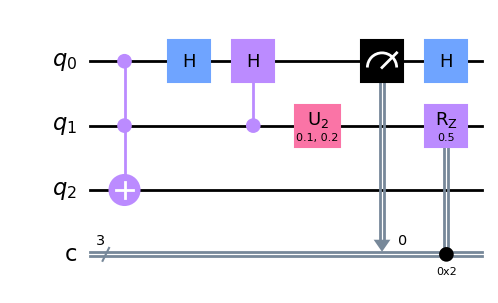

In [23]:
from qiskit.converters import dag_to_circuit
circuit = dag_to_circuit(dag)
circuit.draw(output='mpl')

In [24]:
from copy import copy

from qiskit.transpiler.basepasses import TransformationPass
from qiskit.transpiler import Layout
from qiskit.circuit.library import SwapGate


class BasicSwap(TransformationPass):
    """Maps (with minimum effort) a DAGCircuit onto a `coupling_map` adding swap gates."""

    def __init__(self,
                 coupling_map,
                 initial_layout=None):
        """Maps a DAGCircuit onto a `coupling_map` using swap gates.

        Args:
            coupling_map (CouplingMap): Directed graph represented a coupling map.
            initial_layout (Layout): initial layout of qubits in mapping
        """
        super().__init__()
        self.coupling_map = coupling_map
        self.initial_layout = initial_layout

    def run(self, dag):
        """Runs the BasicSwap pass on `dag`.

        Args:
            dag (DAGCircuit): DAG to map.

        Returns:
            DAGCircuit: A mapped DAG.

        Raises:
            TranspilerError: if the coupling map or the layout are not
            compatible with the DAG.
        """
        new_dag = DAGCircuit()
        for qreg in dag.qregs.values():
            new_dag.add_qreg(qreg)
        for creg in dag.cregs.values():
            new_dag.add_creg(creg)


        if self.initial_layout is None:
            if self.property_set["layout"]:
                self.initial_layout = self.property_set["layout"]
            else:
                self.initial_layout = Layout.generate_trivial_layout(*dag.qregs.values())

        if len(dag.qubits) != len(self.initial_layout):
            raise TranspilerError('The layout does not match the amount of qubits in the DAG')

        if len(self.coupling_map.physical_qubits) != len(self.initial_layout):
            raise TranspilerError(
                "Mappers require to have the layout to be the same size as the coupling map")

        canonical_register = dag.qregs['q']
        trivial_layout = Layout.generate_trivial_layout(canonical_register)
        current_layout = trivial_layout.copy()

        for layer in dag.serial_layers():
            subdag = layer['graph']

            for gate in subdag.two_qubit_ops():
                physical_q0 = current_layout[gate.qargs[0]]
                physical_q1 = current_layout[gate.qargs[1]]
                if self.coupling_map.distance(physical_q0, physical_q1) != 1:
                    # Insert a new layer with the SWAP(s).
                    swap_layer = DAGCircuit()
                    swap_layer.add_qreg(canonical_register)

                    path = self.coupling_map.shortest_undirected_path(physical_q0, physical_q1)
                    for swap in range(len(path) - 2):
                        connected_wire_1 = path[swap]
                        connected_wire_2 = path[swap + 1]

                        qubit_1 = current_layout[connected_wire_1]
                        qubit_2 = current_layout[connected_wire_2]

                        # create the swap operation
                        swap_layer.apply_operation_back(SwapGate(),
                                                        qargs=[qubit_1, qubit_2],
                                                        cargs=[])

                    # layer insertion
                    order = current_layout.reorder_bits(new_dag.qubits)
                    new_dag.compose(swap_layer, qubits=order)

                    # update current_layout
                    for swap in range(len(path) - 2):
                        current_layout.swap(path[swap], path[swap + 1])

            order = current_layout.reorder_bits(new_dag.qubits)
            new_dag.compose(subdag, qubits=order)

        return new_dag

In [25]:
q = QuantumRegister(7, 'q')
in_circ = QuantumCircuit(q)
in_circ.h(q[0])
in_circ.cx(q[0], q[4])
in_circ.cx(q[2], q[3])
in_circ.cx(q[6], q[1])
in_circ.cx(q[5], q[0])
in_circ.rz(0.1, q[2])
in_circ.cx(q[5], q[0])

In [26]:
from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap
from qiskit import BasicAer
pm = PassManager()
coupling = [[0, 1], [1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]
coupling_map = CouplingMap(couplinglist=coupling)

pm.append([BasicSwap(coupling_map)])

out_circ = pm.run(in_circ)

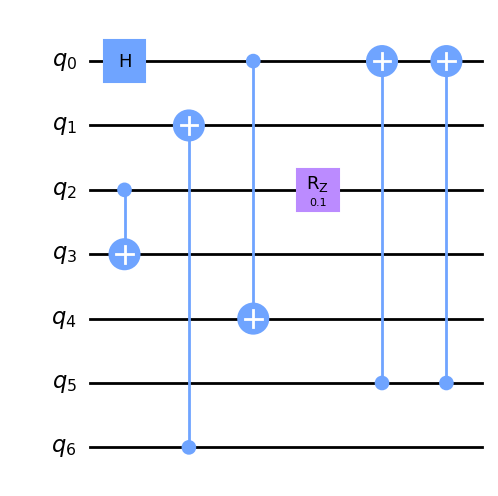

In [27]:
in_circ.draw(output='mpl')

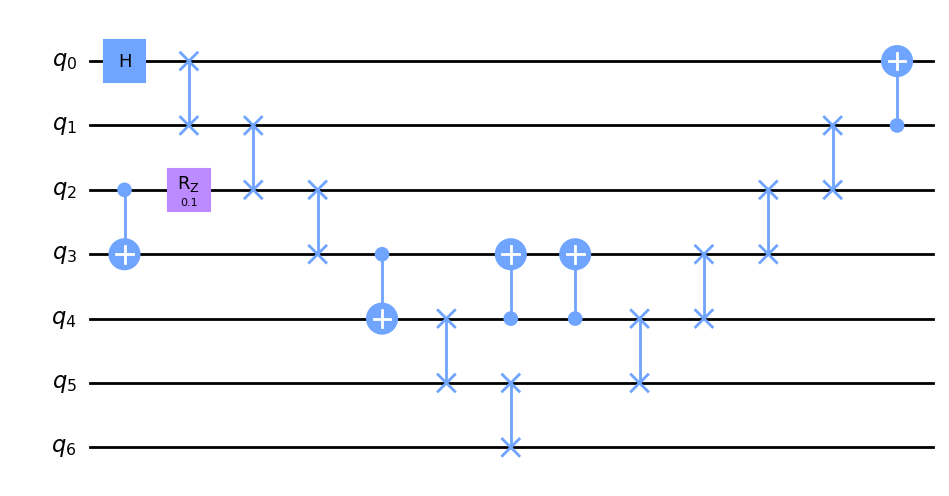

In [28]:
out_circ.draw(output='mpl')

In [29]:
import logging

logging.basicConfig(level='DEBUG')

In [30]:
from qiskit.providers.fake_provider import FakeTenerife


log_circ = QuantumCircuit(2, 2)
log_circ.h(0)
log_circ.h(1)
log_circ.h(1)
log_circ.x(1)
log_circ.cx(0, 1)
log_circ.measure([0,1], [0,1])

backend = FakeTenerife()

transpile(log_circ, backend);

DEBUG:stevedore.extension:found extension EntryPoint(name='basic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:BasicSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='lookahead', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:LookaheadSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='none', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:NoneRoutingPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='sabre', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:SabreSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='stochastic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:StochasticSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoin

In [31]:
logging.getLogger('qiskit.transpiler').setLevel('INFO')
transpile(log_circ, backend);

DEBUG:stevedore.extension:found extension EntryPoint(name='basic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:BasicSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='lookahead', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:LookaheadSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='none', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:NoneRoutingPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='sabre', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:SabreSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='stochastic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:StochasticSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoin

In [32]:
# Change log level back to DEBUG
logging.getLogger('qiskit.transpiler').setLevel('DEBUG')
# Transpile multiple circuits
circuits = [log_circ, log_circ]
transpile(circuits, backend);

DEBUG:stevedore.extension:found extension EntryPoint(name='basic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:BasicSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='lookahead', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:LookaheadSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='none', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:NoneRoutingPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='sabre', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:SabreSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoint(name='stochastic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:StochasticSwapPassManager', group='qiskit.transpiler.routing')
DEBUG:stevedore.extension:found extension EntryPoin

In [33]:
formatter = logging.Formatter('%(name)s - %(processName)-10s - %(levelname)s: %(message)s')
handler = logging.getLogger().handlers[0]
handler.setFormatter(formatter)

In [34]:
transpile(circuits, backend);

stevedore.extension - MainProcess - DEBUG: found extension EntryPoint(name='basic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:BasicSwapPassManager', group='qiskit.transpiler.routing')
stevedore.extension - MainProcess - DEBUG: found extension EntryPoint(name='lookahead', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:LookaheadSwapPassManager', group='qiskit.transpiler.routing')
stevedore.extension - MainProcess - DEBUG: found extension EntryPoint(name='none', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:NoneRoutingPassManager', group='qiskit.transpiler.routing')
stevedore.extension - MainProcess - DEBUG: found extension EntryPoint(name='sabre', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:SabreSwapPassManager', group='qiskit.transpiler.routing')
stevedore.extension - MainProcess - DEBUG: found extension EntryPoint(name='stochastic', value='qiskit.transpiler.preset_passmanagers.builtin_plugins:StochasticSwapPassManager', g

In [35]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright